<a href="https://colab.research.google.com/github/museltabares0285/semanatec/blob/main/Copy_of_6_3_Actividad_Regresion_Linea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad

- **Nombre**: Musel Tabares
- **Matrícula**: A00830710

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


#**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/SemanaTec/arte-analitica

/gdrive/MyDrive/SemanaTec/arte-analitica


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("data/presion.csv")
df

,edad,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406
6,44,122.945012,93.051815
7,45,123.417437,93.167768
8,46,128.783079,89.546531
9,47,125.049072,93.523873


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión ( alta y baja) 


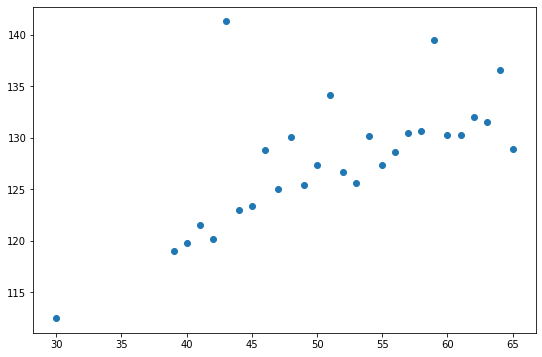

In [ ]:
# alta
plt.figure(figsize=[9, 6])
plt.scatter(df["edad"], df["Average of ap_hi"])

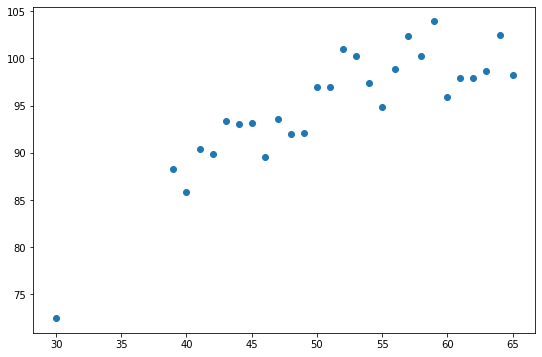

In [ ]:
# baja
plt.figure(figsize=[9, 6])
plt.scatter(df["edad"], df["Average of ap_lo"])

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**.

¿Cuál es el valor de a y cuál es el valor de b para la presión alta y baja?

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# alta
modelhi = LinearRegression(fit_intercept=True)
modelhi.fit(df[["edad"]], df["Average of ap_hi"])
print("a = "+str(modelhi.coef_[0]))
print("b = "+str(modelhi.intercept_))

a = 0.4776970297766919
b = 103.39697409643658


In [ ]:
# baja
modello = LinearRegression(fit_intercept=True)
modello.fit(df[["edad"]], df["Average of ap_lo"])
print("a = "+str(modello.coef_[0]))
print("b = "+str(modello.intercept_))

a = 0.6089810580238239
b = 63.726200409422745


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

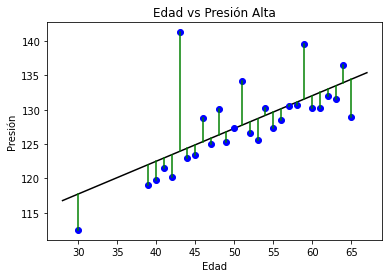

In [ ]:
# alta

xfit = np.linspace(28, 67, 10000)
yfit = modelhi.predict(xfit[:, np.newaxis])

plt.plot(xfit, yfit, color="black");
plt.plot(df["edad"], df["Average of ap_hi"], 'o', color="blue")
plt.plot(np.vstack([df["edad"],df["edad"]]), np.vstack([df["Average of ap_hi"], modelhi.predict(df[["edad"]])]), color="green");
plt.title("Edad vs Presión Alta");
plt.xlabel("Edad");
plt.ylabel("Presión");

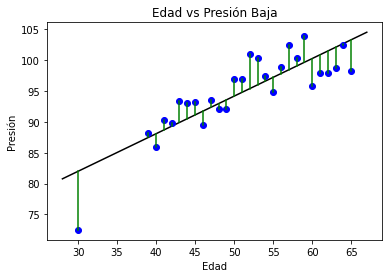

In [ ]:
# baja
yfit = modello.predict(xfit[:, np.newaxis])

plt.plot(xfit, yfit, color="black");
plt.plot(df["edad"], df["Average of ap_lo"], 'o', color="blue")
plt.plot(np.vstack([df["edad"],df["edad"]]), np.vstack([df["Average of ap_lo"], modello.predict(df[["edad"]])]), color="green");
plt.title("Edad vs Presión Baja");
plt.xlabel("Edad");
plt.ylabel("Presión");

5. ¿Cuál es la presión arterial hi y lo esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular=76

def presionLo(edad):
  return modello.coef_[0]*edad+modello.intercept_

presionLo(edad_calcular)

110.00876081923336

In [ ]:
def presionHi(edad):
  return modelhi.coef_[0]*edad+modelhi.intercept_

presionHi(edad_calcular)

139.70194835946518

6. Conclusiones 

 matrícula- Nombre alumno : detalle





#Opcion: **Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

In [ ]:
df2 = pd.read_csv("data/insurance.csv")
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [ ]:
region_dict = {"northeast": 0, "southeast": 1, "southwest": 2, "northwest": 3}
df2["fuma"] = (df2["smoker"]!="yes").astype(dtype=int)
df2["region2"] = [region_dict[i] for i in df2["region"]]
df2["sexo"] = (df2["sex"]!="male").astype(int)
df2


,age,sex,bmi,children,smoker,region,charges,fuma,region2,sexo
0,19,female,27.900,0,yes,southwest,16884.92400,0,2,1
1,18,male,33.770,1,no,southeast,1725.55230,1,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,3,0
4,32,male,28.880,0,no,northwest,3866.85520,1,3,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,3,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,1,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,1,2,1


2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

<Figure size 648x432 with 0 Axes>

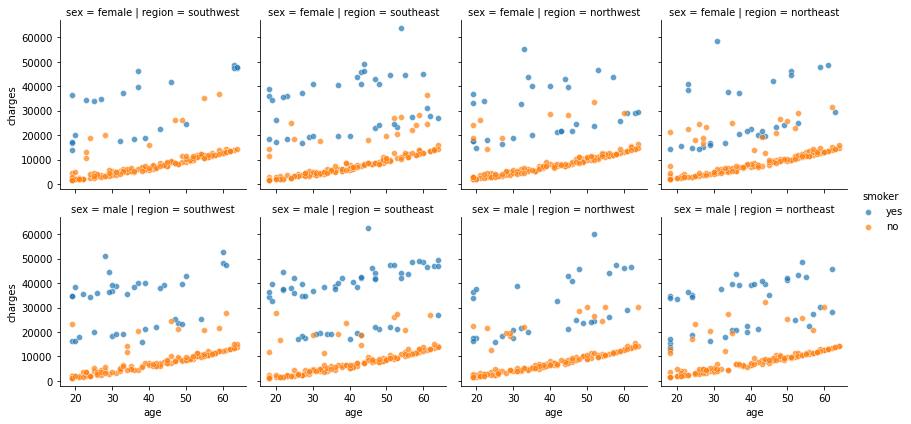

In [ ]:
import seaborn as sns
plt.figure(figsize=[9, 6])
g = sns.FacetGrid(data=df2, col="region", row="sex", hue="smoker");
g.map(sns.scatterplot, "age", "charges", alpha=.7);
g.add_legend();


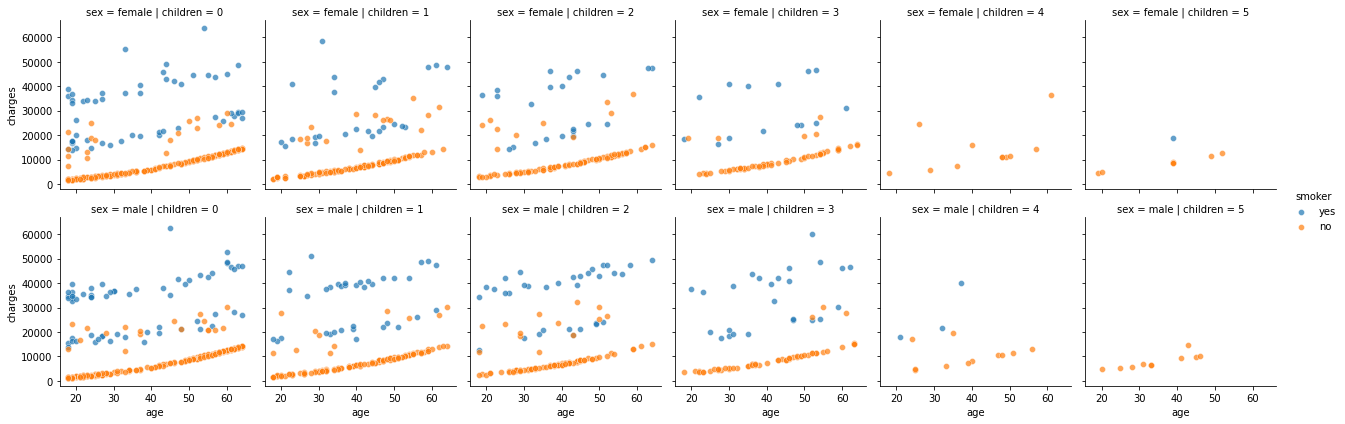

In [ ]:
g = sns.FacetGrid(data=df2, col="children", row="sex", hue="smoker");
g.map(sns.scatterplot, "age", "charges", alpha=.7);
g.add_legend();

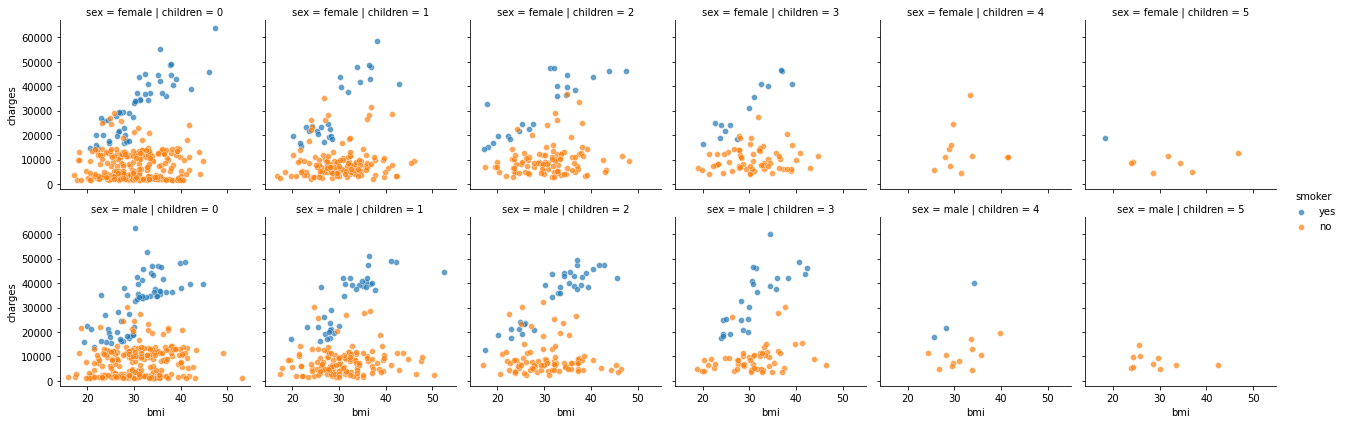

In [ ]:
g = sns.FacetGrid(data=df2, col="children", row="sex", hue="smoker");
g.map(sns.scatterplot, "bmi", "charges", alpha=.7);
g.add_legend();

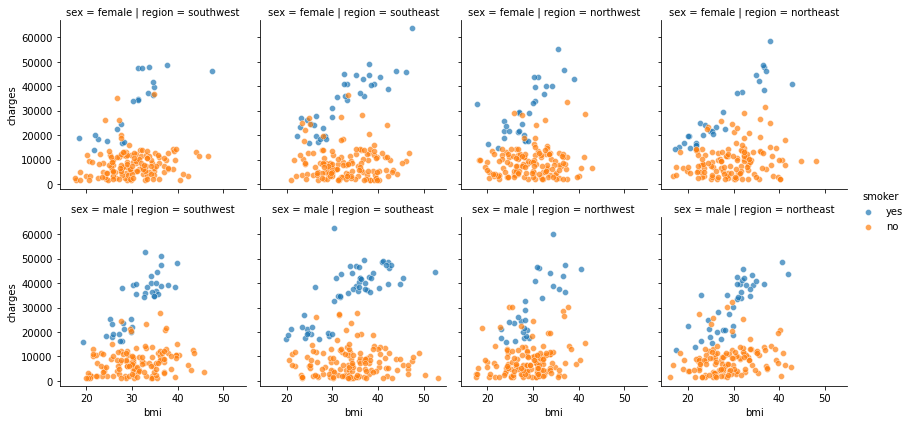

In [ ]:
g = sns.FacetGrid(data=df2, col="region", row="sex", hue="smoker");
g.map(sns.scatterplot, "bmi", "charges", alpha=.7);
g.add_legend();

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

Hay una correlación fuerte entre la edad y lo que te cobran y fumar incrementa el costo. Si tomamos al bmi como la variable independiente entonces no parece haber mucha correlación entre el bmi y el costo hasta que tomamos en cuenta si fuman o no. Los fumadores tienen una correlación relativamente alta entre el costo y su bmi y es una pendiente más elevada que la que se ve en las gráficas de edad-costo. Las otras variables no parecen influir mucho.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

In [ ]:
testvars = ["age", "bmi", "children"]
separators = ["-----Edad vs Costo----------------------",
              "-----Indice de masa corporal vs Costs---",
              "-----Niños vs Costo---------------------"]
models = [LinearRegression(fit_intercept=True) for i in range(0, 3)]
[models[i].fit(df2[[j]], df2["charges"]) for i, j in enumerate(testvars)];
for i in range(0, 3):
  print(separators[i])
  print("beta_0 = "+str(models[i].intercept_))
  print("beta_1 = "+str(models[i].coef_[0]))
  print("score = "+str(models[i].score(df2[[testvars[i]]], df2["charges"])))

-----Edad vs Costo----------------------
beta_0 = 3165.885006063021
beta_1 = 257.72261866689564
score = 0.08940589967885804
-----Indice de masa corporal vs Costs---
beta_0 = 1192.937208961148
beta_1 = 393.8730307973953
score = 0.03933913991786275
-----Niños vs Costo---------------------
beta_0 = 12522.495549644098
beta_1 = 683.0893824813637
score = 0.004623758854459203


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

El mejor es edad vs costo, después masa corporal vs costo y por último niños vs costo.

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

In [ ]:
testcombinations = [["bmi", "fuma"],
                    ["age", "fuma"],
                    ["age", "fuma", "bmi"],
                    ["age", "sexo", "bmi"],
                    ["age", "region2", "bmi"],
                    ["age", "fuma", "bmi", "children"],
                    ["age", "fuma", "bmi", "region2"],
                    ["age", "fuma", "bmi", "sexo"]]

def ajustaScore(df, s, tc):
  return (1-(1-s)*((len(df.index)-1)/(len(df.index)-len(tc)-1)))

modelmultiple = [LinearRegression(fit_intercept=True) for i in range(0, 6)]
for i in range(0, 6):
  print("-----"+str(testcombinations[i])+" vs Costo-----")
  modelmultiple[i].fit(df2[testcombinations[i]], df2["charges"])
  print("beta_0 = "+str(modelmultiple[i].intercept_))
  print("betas = "+str(modelmultiple[i].coef_))
  print("score = "+str(modelmultiple[i].score(df2[testcombinations[i]], df2["charges"])))
  print("score ajustada = "+str(ajustaScore(df2, modelmultiple[i].score(df2[testcombinations[i]], df2["charges"]), testcombinations[i])))

-----['bmi', 'fuma'] vs Costo-----
beta_0 = 20134.885477840136
betas = [   388.01524592 -23593.98099851]
score = 0.6579419945598348
score ajustada = 0.6574295481097372
-----['age', 'fuma'] vs Costo-----
beta_0 = 21463.678457304522
betas = [   274.87118587 -23855.30481666]
score = 0.72140082605772
score ajustada = 0.7209834490181062
-----['age', 'fuma', 'bmi'] vs Costo-----
beta_0 = 12146.854070121008
betas = [   259.54749155 -23823.68449531    322.61513282]
score = 0.7474771588119513
score ajustada = 0.7469092663655015
-----['age', 'sexo', 'bmi'] vs Costo-----
beta_0 = -5642.352352859838
betas = [  243.18647145 -1344.4639883    327.53561761]
score = 0.1202580343975943
score ajustada = 0.11827960419009254
-----['age', 'region2', 'bmi'] vs Costo-----
beta_0 = -5611.940793890299
betas = [ 242.244114   -459.89781238  328.35082571]
score = 0.11893876212530041
score ajustada = 0.11695736503862564
-----['age', 'fuma', 'bmi', 'children'] vs Costo-----
beta_0 = 11708.630481873939
betas = [   25

 7. ¿Cuál modelo es el que nos conviene elegir?

El que tiene mayor score es el que toma en cuenta edad, si el asegurado fuma o no, su índice de masa corporal y cuantos hijos tiene. Sin embargo, muchas de las combinaciones que consideran la edad y si fuma tienen un score muy parecido por lo que se podría decir que la mayoría de las partes explicables del modelo se explican con esas dos variables.



8. Conclusiones 

Presión
A partir de los datos podemos concluir que existe una alta correlación entre la edad y la presión. De la misma manera en la cual podemos establecer un modelo predictivo el cual nos indicaría que a mayor edad se tiende de manera promedio a tener mayor presión.
Seguros
A partir de las relaciones que establecimos pudimos darnos cuenta que en primer respecto a las gráficas existe una fuerte correlación respecto al fumar, la edad el bmi con el costo de los seguros, sin embargo dicha relación no se presenta de manera independiente eso quiere decir que el modelo no puede explicarse solamente en base a una variable. . Y esto lo pudimos corroborar a la hora de establecer la regresión lineal múltiple con el score donde las 2 variables que más prevalecieron era la edad y el si fumaba o no.


 matrícula- Nombre alumno : detalle